In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import skimage.feature
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

## **Importing Images (RGB) & its corresponding labels**

In [ ]:
images = np.load('/content/drive/MyDrive/Data_Set/trnImage.npy')
label_fine = np.load('/content/drive/MyDrive/Data_Set/trnLabel_fine.npy')
label_coarse = np.load('/content/drive/MyDrive/Data_Set/trnLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Images Fine Labels Shape: {label_fine.shape}')
print(f'Images Coarse Labels Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)


## **Reshaping 'trn_img' to get Samples on the first column**

In [ ]:
type(images)
# Calling transpose on our 4D tensor
transposed = np.transpose(images, [3,0,1,2])
print(f'Shape of transposed: {transposed.shape}')

Shape of transposed: (50000, 32, 32, 3)


## **Check for a Sample Image from the Training Data**

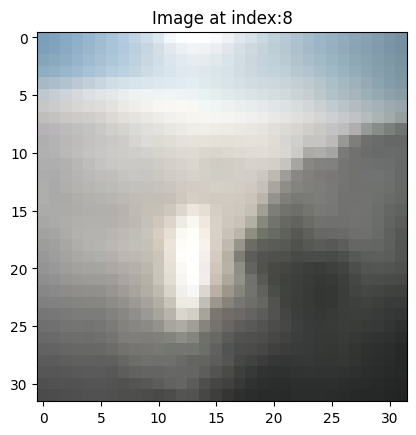

In [ ]:
image_index = 8 # pick a specific image
image = images[:, :, :, image_index]
#Sample image
plt.figure()
# plt.subplot()
plt.imshow(image)#(images[:, :, :, 0])
plt.title(f'Image at index:{image_index}')
plt.show()

## **Check for Data size and identity the number of samples stored in fine and coarse labels**

In [ ]:
# Checking unique values for the model
fine_label , counts = np.unique(label_fine, return_counts = True)
print(np.asarray((fine_label, counts)).T)


# Checking unique values for the model
coarse_label , counts = np.unique(label_coarse, return_counts = True)
print(np.asarray((coarse_label, counts)).T)

[[  0 500]
 [  1 500]
 [  2 500]
 [  3 500]
 [  4 500]
 [  5 500]
 [  6 500]
 [  7 500]
 [  8 500]
 [  9 500]
 [ 10 500]
 [ 11 500]
 [ 12 500]
 [ 13 500]
 [ 14 500]
 [ 15 500]
 [ 16 500]
 [ 17 500]
 [ 18 500]
 [ 19 500]
 [ 20 500]
 [ 21 500]
 [ 22 500]
 [ 23 500]
 [ 24 500]
 [ 25 500]
 [ 26 500]
 [ 27 500]
 [ 28 500]
 [ 29 500]
 [ 30 500]
 [ 31 500]
 [ 32 500]
 [ 33 500]
 [ 34 500]
 [ 35 500]
 [ 36 500]
 [ 37 500]
 [ 38 500]
 [ 39 500]
 [ 40 500]
 [ 41 500]
 [ 42 500]
 [ 43 500]
 [ 44 500]
 [ 45 500]
 [ 46 500]
 [ 47 500]
 [ 48 500]
 [ 49 500]
 [ 50 500]
 [ 51 500]
 [ 52 500]
 [ 53 500]
 [ 54 500]
 [ 55 500]
 [ 56 500]
 [ 57 500]
 [ 58 500]
 [ 59 500]
 [ 60 500]
 [ 61 500]
 [ 62 500]
 [ 63 500]
 [ 64 500]
 [ 65 500]
 [ 66 500]
 [ 67 500]
 [ 68 500]
 [ 69 500]
 [ 70 500]
 [ 71 500]
 [ 72 500]
 [ 73 500]
 [ 74 500]
 [ 75 500]
 [ 76 500]
 [ 77 500]
 [ 78 500]
 [ 79 500]
 [ 80 500]
 [ 81 500]
 [ 82 500]
 [ 83 500]
 [ 84 500]
 [ 85 500]
 [ 86 500]
 [ 87 500]
 [ 88 500]
 [ 89 500]
 [ 90 500]

## **Developing Train & Test Data**

**NOTE** :

1. Reshaping the Test_data directly while loading

In [ ]:
trainX = transposed
trainY = label_coarse
testX = np.transpose(np.load('/content/drive/MyDrive/Data_Set/tstImage.npy'),[3,0,1,2])
testY_coarse = np.load('/content/drive/MyDrive/Data_Set/tstLabel_coarse.npy')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Set/coarse_labels.csv')
df.columns

Index(['aquatic mammals', 'fish', 'flowers', 'food containers',
       'fruit and vegetables', 'household electrical devices',
       'household furniture', 'insects', 'large carnivores',
       'large man-made outdoor things', 'large natural outdoor scenes',
       'large omnivores and herbivores', 'medium-sized mammals',
       'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
       'trees', 'vehicles 1', 'vehicles 2'],
      dtype='object')

In [ ]:
# type(trainY),trainY.shape
print(type(list(label_coarse)))
superclass = list(label_coarse)
print(len(superclass))


<class 'list'>
50000


In [ ]:
subCategory = pd.DataFrame(df.columns, columns=['SupClass'])
subCategoryDict = subCategory.to_dict()

In [ ]:
subCategoryDict

{'SupClass': {0: 'aquatic mammals',
  1: 'fish',
  2: 'flowers',
  3: 'food containers',
  4: 'fruit and vegetables',
  5: 'household electrical devices',
  6: 'household furniture',
  7: 'insects',
  8: 'large carnivores',
  9: 'large man-made outdoor things',
  10: 'large natural outdoor scenes',
  11: 'large omnivores and herbivores',
  12: 'medium-sized mammals',
  13: 'non-insect invertebrates',
  14: 'people',
  15: 'reptiles',
  16: 'small mammals',
  17: 'trees',
  18: 'vehicles 1',
  19: 'vehicles 2'}}

**One Hot Encoding**

In [ ]:
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY_coarse)

print(trainY.shape)
print(testY.shape)

(50000, 20)
(10000, 20)


In [ ]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, train_size=0.8)

## **Normalization**

In [ ]:
# scale pixels
def prep_data(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

## **Developing Coarse Model (3 Blocks CNN)**

## **Importing Necessary Libraries**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten

 **1. Stack convolutional layers with 3x3 kernels followed by a max pooling layer. This forms a block which can be repeated with increasing number of filters**

**2. We use padding so that the height and width of the output feature maps matches with inputs**.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# **Dense Layer**
**This layer helps in changing the dimensionality of the output from the preceding layer so that the model can easily define the relationship between the values of the data in which the model is working.**

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(20, activation='softmax'))

## **Compiling the model**

In [ ]:
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# **Fitting the model:**

In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data = (valX, valY), verbose = 2)

Epoch 1/100
625/625 - 17s - loss: 2.6444 - accuracy: 0.1895 - val_loss: 2.4741 - val_accuracy: 0.2481 - 17s/epoch - 26ms/step
Epoch 2/100
625/625 - 5s - loss: 2.3762 - accuracy: 0.2715 - val_loss: 2.3224 - val_accuracy: 0.2903 - 5s/epoch - 8ms/step
Epoch 3/100
625/625 - 4s - loss: 2.2153 - accuracy: 0.3207 - val_loss: 2.1672 - val_accuracy: 0.3377 - 4s/epoch - 7ms/step
Epoch 4/100
625/625 - 4s - loss: 2.0962 - accuracy: 0.3550 - val_loss: 2.0879 - val_accuracy: 0.3598 - 4s/epoch - 7ms/step
Epoch 5/100
625/625 - 5s - loss: 1.9978 - accuracy: 0.3834 - val_loss: 2.0099 - val_accuracy: 0.3790 - 5s/epoch - 9ms/step
Epoch 6/100
625/625 - 4s - loss: 1.9031 - accuracy: 0.4117 - val_loss: 1.9627 - val_accuracy: 0.3912 - 4s/epoch - 7ms/step
Epoch 7/100
625/625 - 4s - loss: 1.8243 - accuracy: 0.4337 - val_loss: 1.8805 - val_accuracy: 0.4164 - 4s/epoch - 7ms/step
Epoch 8/100
625/625 - 5s - loss: 1.7438 - accuracy: 0.4563 - val_loss: 1.8476 - val_accuracy: 0.4256 - 5s/epoch - 8ms/step
Epoch 9/100
6

# **Saving the Model File:**

In [ ]:
model1_sv = model.save

# **Plot history FUNCTION Reference**

In [ ]:
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
    plt.show()

# **Plot Training and Validation Accuracy and loss**

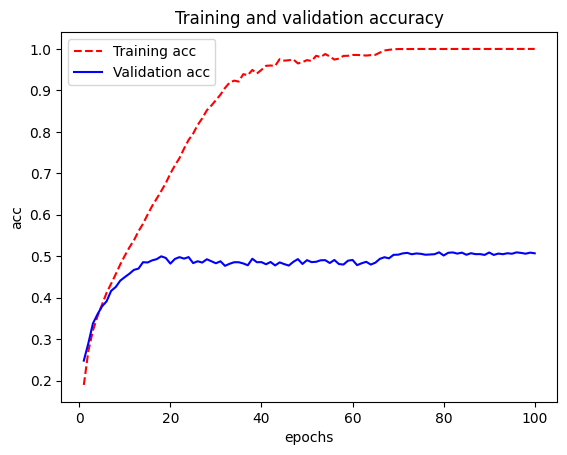

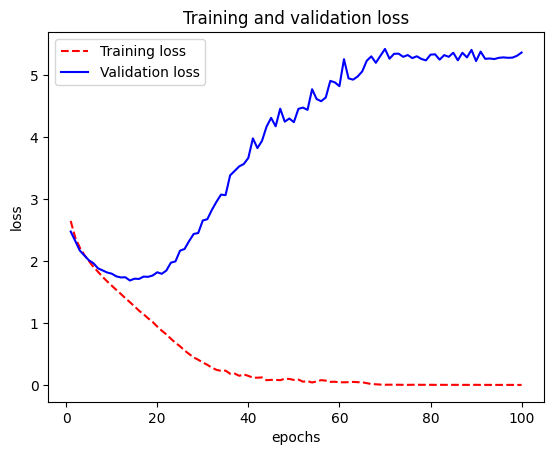

<Figure size 640x480 with 0 Axes>

313/313 - 1s - loss: 5.4829 - accuracy: 0.5059 - 1s/epoch - 4ms/step
test accuracy:  0.5059000253677368
> 50.590


In [ ]:
plot_history(history)
test_loss, test_acc = model.evaluate(testX, testY, verbose=2)
print("test accuracy: ", test_acc)

print('> %.3f' % (test_acc * 100.0))

# **Compute Accuracy**

In [ ]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 50.590


# **Plot the confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.tight_layout()
    plt.ylabel('Observacion')
    plt.xlabel('Prediction')

Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
Y_pred_classes

array([19, 16, 15, ...,  1, 13, 13])

In [ ]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
testY_orig = np.load('/content/drive/MyDrive/Data_Set/tstLabel_coarse.npy')
testY_orig

array([10, 10,  0, ...,  4,  8,  2])

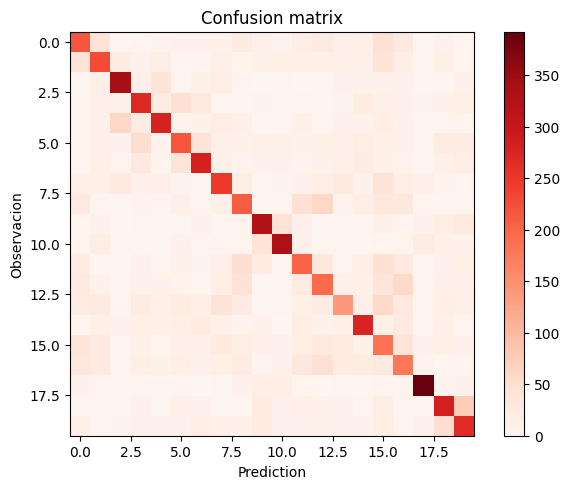

In [ ]:
confusion_mtx = confusion_matrix(testY_orig, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))

# **Analysis on Finer Classes**

In [ ]:
trainX = transposed
trainY = label_fine
testX = np.transpose(np.load('/content/drive/MyDrive/Data_Set/tstImage.npy'),[3,0,1,2])
testY_fine = np.load('/content/drive/MyDrive/Data_Set/tstLabel_fine.npy')
df1 = pd.read_csv('/content/drive/MyDrive/fine_labels.csv')
df1.head
df1.columns

subclass = list(label_fine)

subCategory = pd.DataFrame(df1.columns, columns=['SubClass'])
subCategoryDict = subCategory.to_dict()
subCategoryDict

{'SubClass': {0: 'apples',
  1: 'aquarium fish',
  2: 'baby',
  3: 'bear',
  4: 'beaver',
  5: 'bed',
  6: 'bee',
  7: 'beetle',
  8: 'bicycle',
  9: 'bottles',
  10: 'bowls',
  11: 'boy',
  12: 'bridge',
  13: 'bus',
  14: 'butterfly',
  15: 'camel',
  16: 'cans',
  17: 'castle',
  18: 'caterpillar',
  19: 'cattle',
  20: 'chair',
  21: 'chimpanzee',
  22: 'clock',
  23: 'cloud',
  24: 'cockroach',
  25: 'couch',
  26: 'crab',
  27: 'crocodile',
  28: 'cups',
  29: 'dinosaur',
  30: 'dolphin',
  31: 'elephant',
  32: 'flatfish',
  33: 'forest',
  34: 'fox',
  35: 'girl',
  36: 'hamster',
  37: 'house',
  38: 'kangaroo',
  39: 'keyboard',
  40: 'lamp',
  41: 'lawn-mower',
  42: 'leopard',
  43: 'lion',
  44: 'lizard',
  45: 'lobster',
  46: 'man',
  47: 'maple',
  48: 'motorcycle',
  49: 'mountain',
  50: 'mouse',
  51: 'mushrooms',
  52: 'oak',
  53: 'oranges',
  54: 'orchids',
  55: 'otter',
  56: 'palm',
  57: 'pears',
  58: 'pickup truck',
  59: 'pine',
  60: 'plain',
  61: 'plates

# **One Hot Encode**

In [ ]:
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY_fine)

print(trainX.shape)
print(trainY.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 100, 2, 2)
(10000, 100)


# **Splitting the Finer Dataset**

In [ ]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, train_size=0.8)

# **Training the Finer Dataset**

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(100, activation='softmax'))

# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history2 = model1.fit(trainX, trainY, epochs=100, batch_size=64,
                    validation_data=(valX, valY), verbose=2)

Epoch 1/100
782/782 - 7s - loss: 3.3849 - accuracy: 0.1892 - val_loss: 3.1666 - val_accuracy: 0.2307 - 7s/epoch - 9ms/step
Epoch 2/100
782/782 - 6s - loss: 2.8927 - accuracy: 0.2798 - val_loss: 2.6257 - val_accuracy: 0.3349 - 6s/epoch - 7ms/step
Epoch 3/100
782/782 - 6s - loss: 2.5680 - accuracy: 0.3448 - val_loss: 2.3112 - val_accuracy: 0.4010 - 6s/epoch - 7ms/step
Epoch 4/100
782/782 - 6s - loss: 2.2885 - accuracy: 0.4026 - val_loss: 2.1456 - val_accuracy: 0.4397 - 6s/epoch - 8ms/step
Epoch 5/100
782/782 - 6s - loss: 2.0833 - accuracy: 0.4493 - val_loss: 1.7562 - val_accuracy: 0.5223 - 6s/epoch - 7ms/step
Epoch 6/100
782/782 - 6s - loss: 1.8878 - accuracy: 0.4877 - val_loss: 1.7511 - val_accuracy: 0.5265 - 6s/epoch - 8ms/step
Epoch 7/100
782/782 - 6s - loss: 1.7237 - accuracy: 0.5286 - val_loss: 1.4835 - val_accuracy: 0.5871 - 6s/epoch - 7ms/step
Epoch 8/100
782/782 - 6s - loss: 1.5704 - accuracy: 0.5631 - val_loss: 1.2567 - val_accuracy: 0.6462 - 6s/epoch - 7ms/step
Epoch 9/100
782/

# **Saving the Model**

In [ ]:
model1_sv = model1.save

313/313 - 1s - loss: 4.8856 - accuracy: 0.3294 - 950ms/epoch - 3ms/step
test accuracy:  0.3294000029563904


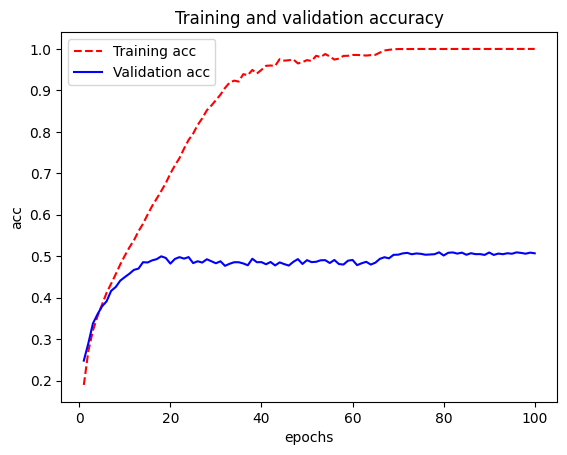

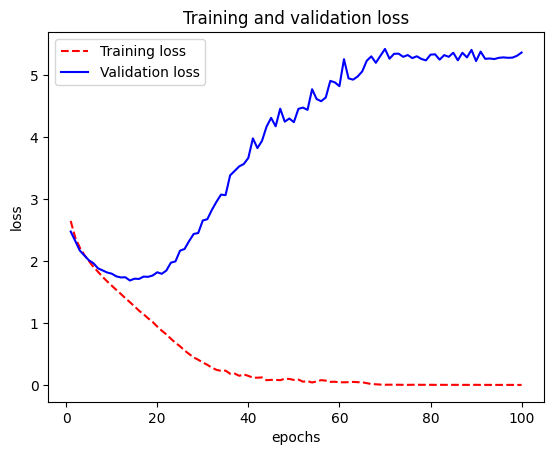

<Figure size 640x480 with 0 Axes>

In [ ]:
testX = np.transpose(np.load('/content/drive/MyDrive/tstImage.npy'),[3,0,1,2])

plot_history(history2)
test_loss,test_acc=model1.evaluate(testX, testY, verbose=2)
print("test accuracy: ",test_acc)

# **Plot the Confusion Matrix**

In [ ]:
_, acc = model1.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 32.940


In [ ]:
testY_orig = np.load('/content/drive/MyDrive/tstLabel_fine.npy')
testY_orig


array([49, 33, 72, ..., 51, 42, 70])

313/313 [==============================] - 2s 5ms/step


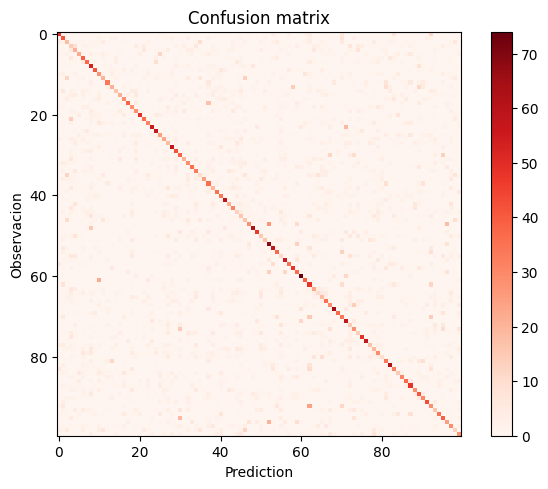

In [ ]:
Y_pred = model1.predict(testX)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
confusion_mtx = confusion_matrix(testY_orig, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))

In [ ]:
idx,counts =np.unique(Y_pred_classes,return_counts=True,axis=0)
np.unique(Y_pred_classes,return_counts=True,axis=0)

print('FREQUENT CLASSES')
for number in range(idx.shape[0]):
    clase=idx[number]
    if counts[number]>500:
        print('clase: ' +(str(subCategoryDict['SubClass'][clase]))+' ('+str(clase) +') counts: '+str(counts[number]))

FREQUENT CLASSES


**Classes which were not chosen in prediction**

In [ ]:
print('NON-FREQUENT CLASSES')
for all_classes in range(100):
    found=False
    for i in range(idx.shape[0]):
        if all_classes==idx[i]:
            found=True
    if found==False:
        print('clase: ' +(str(subCategoryDict['SubClass'][all_classes]))+' ('+str(all_classes) +') counts: '+str(0))

NON-FREQUENT CLASSES


# **Predictions (Fine - Subclass)**

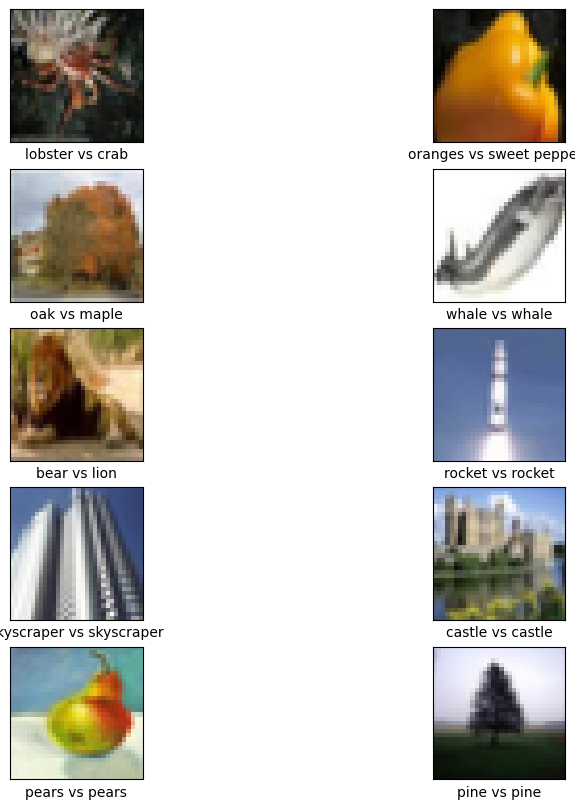

In [ ]:
plt.figure(figsize=(10,10))
for image in range(0,10):
    i=image
    # plt.subplot(3,3,i+1)
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+100# add 25 by 25 to change the photo block
    data_plot = testX[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subCategoryDict['SubClass'][Y_pred_classes[j]]) + " vs " + str(subCategoryDict['SubClass'][testY_orig[j]]))
plt.show()

# **Approach : 2**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.feature import hog
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [4]:
# Load data
images_train = np.load('/content/drive/MyDrive/Data_Set_2/trnImage.npy')
images_test = np.load('/content/drive/MyDrive/Data_Set_2/tstImage.npy')
train_label = np.load('/content/drive/MyDrive/Data_Set_2/trnLabel.npy')
test_label = np.load('/content/drive/MyDrive/Data_Set_2/tstLabel.npy')

In [5]:
# Transpose image data
images_train = images_train.transpose(3, 0, 1, 2)
images_test = images_test.transpose(3, 0, 1, 2)

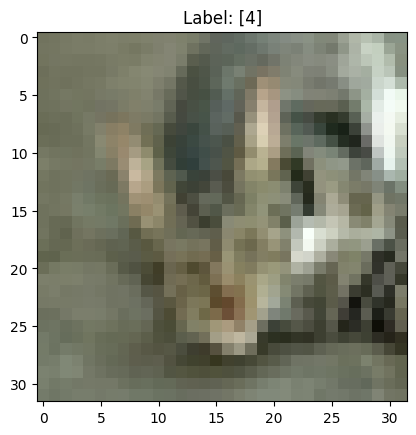

In [15]:
# Display an example image and its label
plt.imshow(images_train[3, :, :, :])
plt.title(f"Label: {train_label[1, :]}")
plt.show()

In [7]:
# Shuffle training data
images_train, train_label = shuffle(images_train, train_label)

In [8]:
# Print data shapes
print("Training data shape:", images_train.shape)
print("Testing data shape:", images_test.shape)

Training data shape: (10000, 32, 32, 3)
Testing data shape: (1000, 32, 32, 3)


In [9]:
# Reshape data for SVM
images_train_ = np.reshape(images_train, newshape=(10000, 3072))
images_test_ = np.reshape(images_test, newshape=(1000, 3072))

In [10]:
# Initialize and train SVM model
model3 = SVC(kernel='linear', random_state=28)
model3.fit(images_train_, train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=28)

In [11]:
# Evaluate the model on the test set
accuracy = model3.score(images_test_, test_label)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.314


In [12]:
# Make predictions on the test set
y_pred = model3.predict(images_test_)

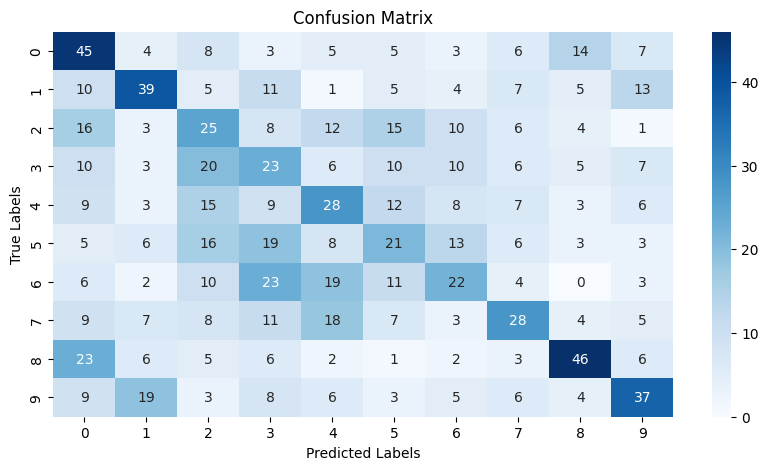

Accuracy Score: 0.314


In [13]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=[10, 5])
sns.heatmap(confusion_matrix(test_label, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display additional metrics
print("Accuracy Score:", accuracy_score(test_label, y_pred))
#print("Classification Report:\n", classification_report(test_label, y_pred))